<a href="https://colab.research.google.com/github/ziajoriii7-ggg/Applied_calculus_with_Python/blob/main/(TP)%20Splines%20C%C3%BAbicos%20modelado%20Trabajo%20Final/Splines_c%C3%BAbicos_con_matplotlib_%E2%80%94_E_8_12_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trasladar Forma de Splines cúbicos a Python: def + graficar + obtener datos numéricos + plot labels

### Utilización de la biblioteca NumPy en el código

`NumPy` se utiliza para:
- **NumPy para obtener valores de matrices y realizar manipulación de Matrices y Vectores**: Se utilizan matrices para resolver un Sistema de Ecuaciones Lineales (SEL).

- **Manipulación de Matrices y Vectores:** En la función `spline_cubico`, se utilizan matrices para resolver un sistema de ecuaciones lineales (SEL).

- **Resolución de Sistemas de Ecuaciones Lineales:** La función `np.linalg.solve` se utiliza para resolver el sistema de ecuaciones lineales que surge al aplicar las condiciones de los splines cúbicos. Este es un problema clásico de álgebra lineal.

- **Generación de Valores en un Intervalo:** La función `np.linspace` se utiliza para *generar un conjunto de puntos en un intervalo específico*. Esto es útil para *evaluar el spline cúbico en varios puntos dentro de cada subintervalo*.

- **Cálculos Numéricos**: NumPy también se utiliza para realizar cálculos numéricos como sumas, restas, multiplicaciones, etc.

- **Manipulación de Datos:** Las funciones como `np.array` y `np.append` se utilizan para manipular y almacenar datos en una forma que sea fácilmente accesible y modificable.


`matplotlib` se utiliza para:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def spline_cubico(puntos_x, puntos_y):
    numero_de_puntos = len(puntos_x) - 1
    intervalos_h = np.diff(puntos_x)
    coeficientes_alfa = 3 * ((np.diff(puntos_y)[1:] / intervalos_h[1:]) - (np.diff(puntos_y)[:-1] / intervalos_h[:-1]))

    # Crear matriz tridiagonal
    diagonal_l = np.zeros(numero_de_puntos + 1)
    subdiagonal_mu = np.zeros(numero_de_puntos)
    solucion_z = np.zeros(numero_de_puntos + 1)
    diagonal_l[0] = 1

    # Resolver sistema de ecuaciones
    for i in range(1, numero_de_puntos):
        diagonal_l[i] = 2 * (puntos_x[i+1] - puntos_x[i-1]) - intervalos_h[i-1] * subdiagonal_mu[i-1]
        subdiagonal_mu[i] = intervalos_h[i] / diagonal_l[i]
        solucion_z[i] = (coeficientes_alfa[i-1] - intervalos_h[i-1] * solucion_z[i-1]) / diagonal_l[i]

    diagonal_l[-1] = 1
    solucion_z[-1] = 0
    coeficientes_c = np.zeros(numero_de_puntos + 1)

    for j in range(numero_de_puntos - 1, -1, -1):
        coeficientes_c[j] = solucion_z[j] - subdiagonal_mu[j] * coeficientes_c[j+1]

    coeficientes_b = (puntos_y[1:] - puntos_y[:-1]) / intervalos_h - intervalos_h * (coeficientes_c[1:] + 2 * coeficientes_c[:-1]) / 3
    coeficientes_d = np.diff(coeficientes_c) / (3 * intervalos_h)
    coeficientes_a = puntos_y[:-1]

    return coeficientes_a, coeficientes_b, coeficientes_c[:-1], coeficientes_d

def graficar_y_obtener_spline_cubico(puntos_x, puntos_y, coeficientes_a, coeficientes_b, coeficientes_c, coeficientes_d):
    numero_intervalos = len(puntos_x) - 1
    valores_x = []
    valores_y = []

    for i in range(numero_intervalos):
        intervalo_x = np.linspace(puntos_x[i], puntos_x[i+1], 100)
        valor_spline = coeficientes_a[i] + coeficientes_b[i] * (intervalo_x - puntos_x[i]) + coeficientes_c[i] * (intervalo_x - puntos_x[i])**2 + coeficientes_d[i] * (intervalo_x - puntos_x[i])**3
        plt.plot(intervalo_x, valor_spline, 'r')

        valores_x.extend(intervalo_x)
        valores_y.extend(valor_spline)

    plt.scatter(puntos_x, puntos_y, c='b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación mediante Splines Cúbicos')
    plt.show()

    return valores_x, valores_y



## Validación de entradas y mostrar gráficos

Ingrese un valor para n entre [8, 12], o -1 para salir: 10


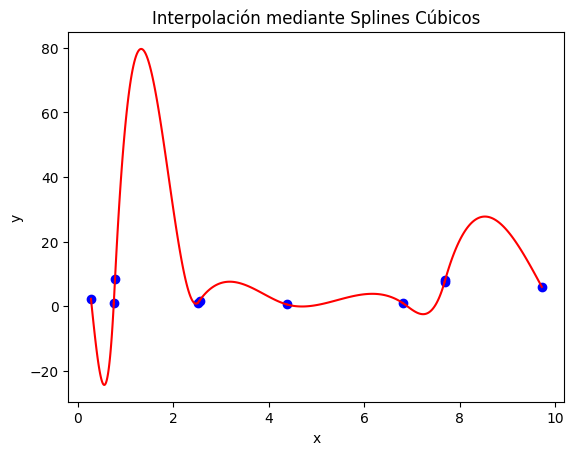

Valores de x: [0.2716277521821886, 0.2764612987161949, 0.2812948452502012, 0.28612839178420746, 0.29096193831821376, 0.29579548485222007, 0.3006290313862263, 0.3054625779202326, 0.31029612445423893, 0.31512967098824524, 0.31996321752225154, 0.3247967640562578, 0.3296303105902641, 0.3344638571242704, 0.33929740365827665, 0.34413095019228296, 0.34896449672628926, 0.35379804326029557, 0.3586315897943019, 0.3634651363283081, 0.36829868286231443, 0.37313222939632074, 0.377965775930327, 0.3827993224643333, 0.3876328689983396, 0.3924664155323459, 0.3972999620663522, 0.40213350860035846, 0.40696705513436476, 0.41180060166837107, 0.4166341482023773, 0.4214676947363836, 0.42630124127038993, 0.43113478780439624, 0.43596833433840254, 0.4408018808724088, 0.4456354274064151, 0.4504689739404214, 0.45530252047442765, 0.46013606700843396, 0.46496961354244026, 0.46980316007644657, 0.4746367066104529, 0.4794702531444591, 0.48430379967846543, 0.48913734621247174, 0.493970892746478, 0.4988044392804843, 0.5

In [ ]:

while True:  # Bucle infinito
    entrada = input("Ingrese un valor para n entre [8, 12], o -1 para salir: ")

    try:
        n = int(entrada)  # Intenta convertir la entrada a un número entero
    except ValueError:  # Se ejecuta si la conversión falla, usuario no ingresó int
        print("Entrada inválida. Por favor, ingrese un número entero.")
        continue

    if n == -1:  # Condicional para salir del bucle
        print("Finalizando programa.")
        break

    if n < 8 or n > 12:
        print("Valor fuera de rango. Intente de nuevo.")
        continue  # Salta al inicio del bucle para que el usuario pueda ingresar de nuevo

    x = np.sort(np.random.rand(n) * 10)
    y = np.random.rand(n) * 10
    a, b, c, d = spline_cubico(x, y)

    a, b, c, d = spline_cubico(x, y)
    valores_x, valores_y = graficar_y_obtener_spline_cubico(x, y, a, b, c, d)

    print("Valores de x:", valores_x)
    print("Valores de y:", valores_y)